In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Spam dataset - https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download
spam_df=pd.read_csv("spam.csv",encoding='latin1')
spam_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
#dropping unnescessary column
spam_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
spam_df = spam_df[['v1', 'v2']]
spam_df.columns = ['label', 'message']

In [10]:
spam_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
spam_df.shape

(5572, 2)

In [11]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
spam_df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
#Checking for missing values
missing_count=spam_df.isnull().sum()
missing_count

label      0
message    0
dtype: int64

No missing values in given dataset

In [18]:
#Checking for duplicated value
spam_df.duplicated().sum()

np.int64(403)

There is 403 dupliacted rows in dataset.

In [19]:
#drop duplicated rows
spam_df = spam_df.drop_duplicates()

In [20]:
spam_df.shape

(5169, 2)

In [21]:
spam_df.duplicated().sum()

np.int64(0)

Removed all Duplicates from the dataset

In [23]:
print("\nClass distribution:")
print(spam_df['label'].value_counts())


Class distribution:
label
ham     4516
spam     653
Name: count, dtype: int64


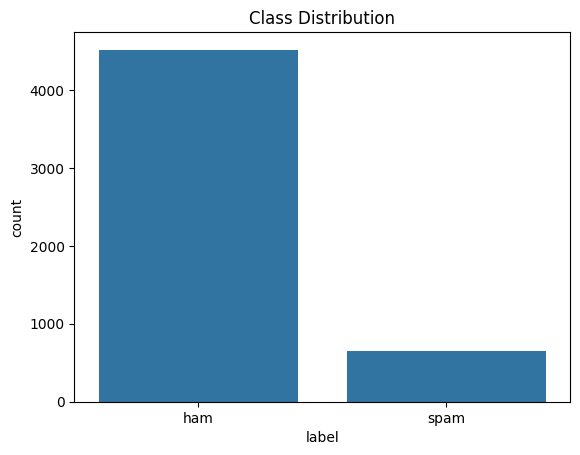

In [24]:
sns.countplot(x='label', data=spam_df)
plt.title('Class Distribution')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21700\2727441247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['message_length'] = spam_df['message'].apply(len)


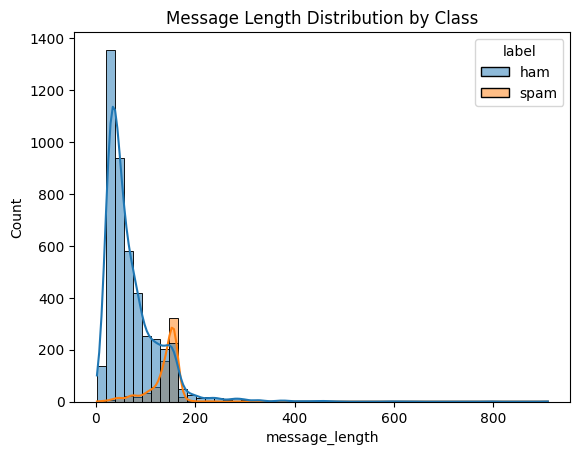

In [25]:
spam_df['message_length'] = spam_df['message'].apply(len)
sns.histplot(data=spam_df, x='message_length', hue='label', bins=50, kde=True)
plt.title('Message Length Distribution by Class')
plt.show()

Helps check if spam messages are generally longer or shorter than ham.-->Spam has shorter length than ham message

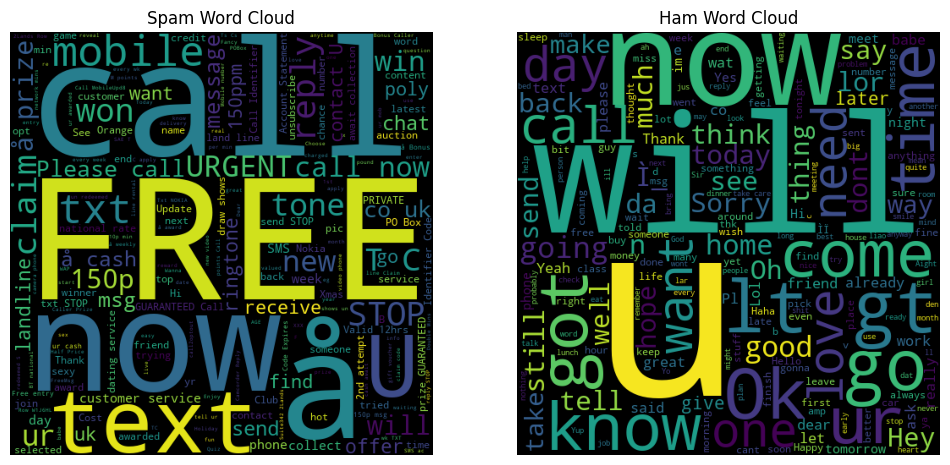

In [27]:
#Wordcloud for Spam and Ham Messages
from wordcloud import WordCloud

spam_words = ' '.join(spam_df[spam_df['label'] == 'spam']['message'])
ham_words = ' '.join(spam_df[spam_df['label'] == 'ham']['message'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=500, height=500).generate(spam_words))
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=500, height=500).generate(ham_words))
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()


Visual representation of most frequent words.

In [28]:
#Encoding of varibale
spam_df['label_num'] = spam_df['label'].map({'ham': 0, 'spam': 1})

In [29]:
spam_df

,label,message,message_length,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,1
5568,ham,Will Ì_ b going to esplanade fr home?,37,0
5569,ham,"Pity, * was in mood for that. So...any other s...",57,0
5570,ham,The guy did some bitching but I acted like i'd...,125,0


In [30]:
#Define features and label
from sklearn.model_selection import train_test_split
X = spam_df['message']
y = spam_df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3876,), (1293,), (3876,), (1293,))

In [32]:
X_train

5022    Anyway holla at me whenever you're around beca...
4411                 If i said anything wrong sorry de:-)
2930                       Hi' Test on  &lt;#&gt; rd ....
3046    Ok. Not much to do here though. H&M Friday, ca...
331     Maybe i could get book out tomo then return it...
                              ...                        
4740    Many more happy returns of the day. I wish you...
474     Nice line said by a broken heart- Plz don't cu...
3266                    Ok then i come n pick u at engin?
4016    Eek that's a lot of time especially since Amer...
879     U have a Secret Admirer who is looking 2 make ...
Name: message, Length: 3876, dtype: object

In [34]:
y_train

5022    0
4411    0
2930    0
3046    0
331     0
       ..
4740    0
474     0
3266    0
4016    0
879     1
Name: label_num, Length: 3876, dtype: int64

In [35]:
X_test

1617                        Did u download the fring app?
2064    Pass dis to all ur contacts n see wat u get! R...
1272                                                Ok...
3020                       Am in film ill call you later.
3642    Sorry, left phone upstairs. OK, might be hecti...
                              ...                        
5571                           Rofl. Its true to its name
4070    I've reached home n i bathe liao... U can call...
4578                   No plans yet. What are you doing ?
4834    OH RITE. WELL IM WITH MY BEST MATE PETE, WHO I...
3896                 No. Thank you. You've been wonderful
Name: message, Length: 1293, dtype: object

In [36]:
y_test

1617    0
2064    0
1272    0
3020    0
3642    0
       ..
5571    0
4070    0
4578    0
4834    0
3896    0
Name: label_num, Length: 1293, dtype: int64

When working with text (like SMS messages), machine learning models cannot directly handle words — they need numbers. So we convert text into numerical features using a process called vectorization.

TF-IDF stands for:

TF = Term Frequency (how often a word appears in a document)
IDF = Inverse Document Frequency (penalizes common words that appear in many documents, like “the”, “and”)
The idea is to give higher weight to words that are frequent in a message but rare in the overall dataset — these are more informative words.

In [37]:
#Feature Extraction (TF-IDF Vectorizer)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

stop_words='english' means it will automatically remove common stop words (like the, is, in, and).

In [38]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [40]:
#Model training
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [41]:
model.fit(X_train_vec, y_train)

MultinomialNB()

In [44]:
#predications
y_pred=model.predict(X_test_vec)

In [47]:
(y_pred)

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
#Evaluating performace metrices
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
score=accuracy_score(y_test,y_pred)
print("Accuracy : ",score)

Accuracy :  0.9605568445475638


In [49]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[1107    0]
 [  51  135]]


In [50]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1158
           1       0.73      1.00      0.84       135

    accuracy                           0.96      1293
   macro avg       0.86      0.98      0.91      1293
weighted avg       0.97      0.96      0.96      1293



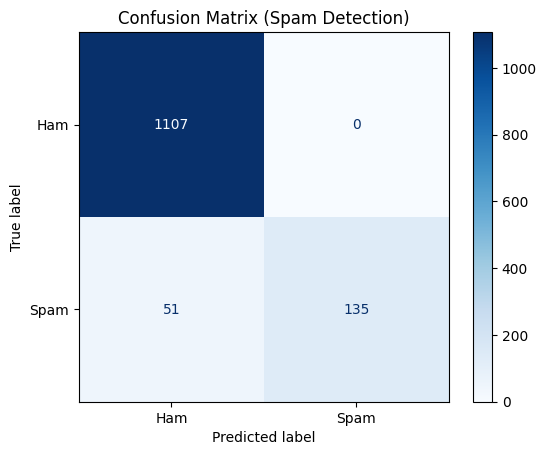

In [51]:
#display confusion matrix
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Spam Detection)')
plt.show()